# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)



['kapaa', 'bela', 'jubayl', 'chokurdakh', 'richards bay', 'san antonio', 'cabo san lucas', 'tiksi', 'ajtos', 'cleethorpes', 'vila velha', 'provideniya', 'avarua', 'beloha', 'punta arenas', 'el faiyum', 'bethel', 'new norfolk', 'dunedin', 'santa cruz cabralia', 'hobyo', 'cape town', 'visegrad', 'vaini', 'mount gambier', 'hermanus', 'barentsburg', 'roald', 'college', 'puerto ayora', 'tsihombe', 'solsvik', 'saint george', 'atuona', 'saint-philippe', 'bluff', 'nikolskoye', 'leningradskiy', 'taolanaro', 'tuktoyaktuk', 'himora', 'mataura', 'esperance', 'honiara', 'kutum', 'abu samrah', 'kemijarvi', 'busselton', 'mehriz', 'yellowknife', 'mezen', 'saskylakh', 'port lincoln', 'lata', 'rawson', 'los llanos de aridane', 'jamestown', 'tabulbah', 'faya', 'digha', 'qaanaaq', 'kabanjahe', 'mujiayingzi', 'thompson', 'batticaloa', 'bilibino', 'one hundred mile house', 'bambanglipuro', 'jalu', 'albany', 'wainwright', 'sorland', 'hobart', 'ushuaia', 'boyolangu', 'murray bridge', 'mersing', 'tasiilaq', 'm

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

url="http://api.openweathermap.org/data/2.5/weather?"
units="metric"
query_url=f"{url}appid={weather_api_key}&units={units}&q="


temp=[]

lat=[]
long=[]
cities_1=[]

humidity=[]


not_found=[]

wind_speed=[]

cloudy=[]


counter=0
for city in cities:
    try:
    
            response = requests.get(query_url + city).json()
    
            temp.append(response["main"]["temp"])
            lat.append(response['coord']['lat'])
            long.append(response['coord']['lon'])
            wind_speed.append(response['wind']['speed'])
            cloudy.append(response["clouds"]['all'])
            
            humidity.append(response["main"]["humidity"])
            cities_1.append(city)
            
            
            counter +=1
            
            print(counter)
            
            
            
            
        
    except:
            not_found.append(city)
           
    

len(not_found)



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
                "City": cities_1,
                "Latitude": lat,
                "Longtitude":long,
                "Temp": temp,
                "Cloudiness":cloudy,
                "Wind Speed":wind_speed,
    
                "Humidity":humidity
                }
weather_data = pd.DataFrame(weather_dict)


In [6]:
weather_data


,City,Latitude,Longtitude,Temp,Cloudiness,Wind Speed,Humidity
0,kapaa,22.0752,-159.3190,17.12,75,2.57,77
1,bela,25.9333,81.9833,15.62,76,1.45,72
2,chokurdakh,70.6333,147.9167,-25.01,98,6.21,88
3,richards bay,-28.7830,32.0377,23.96,30,0.90,93
4,san antonio,29.4241,-98.4936,11.38,90,5.66,40
...,...,...,...,...,...,...,...
555,sakete,6.7362,2.6587,31.00,20,5.66,74
556,margate,51.3813,1.3862,8.33,0,0.89,82
557,panguna,-6.3164,155.4848,20.88,62,0.97,100
558,jiazi,22.8779,116.0670,15.78,0,1.51,80


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
hundred_percent=weather_data.loc[weather_data["Humidity"] <=100]

hundred_percent


,City,Latitude,Longtitude,Temp,Cloudiness,Wind Speed,Humidity
0,kapaa,22.0752,-159.3190,17.12,75,2.57,77
1,bela,25.9333,81.9833,15.62,76,1.45,72
2,chokurdakh,70.6333,147.9167,-25.01,98,6.21,88
3,richards bay,-28.7830,32.0377,23.96,30,0.90,93
4,san antonio,29.4241,-98.4936,11.38,90,5.66,40
...,...,...,...,...,...,...,...
555,sakete,6.7362,2.6587,31.00,20,5.66,74
556,margate,51.3813,1.3862,8.33,0,0.89,82
557,panguna,-6.3164,155.4848,20.88,62,0.97,100
558,jiazi,22.8779,116.0670,15.78,0,1.51,80


In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:

weather_data.describe()

,Latitude,Longtitude,Temp,Cloudiness,Wind Speed,Humidity
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000
mean,20.054189,16.833409,10.470661,54.698214,3.782964,73.151786
std,32.743520,91.123321,17.983676,38.830810,2.535899,18.872896
min,-54.800000,-179.166700,-40.630000,0.000000,0.090000,11.000000
25%,-6.609600,-65.984775,0.525000,15.000000,1.842500,64.000000
50%,22.897250,19.854750,15.610000,72.500000,3.130000,78.000000
75%,46.558325,99.130225,25.000000,90.000000,5.140000,87.000000
max,78.218600,179.316700,36.000000,100.000000,14.680000,100.000000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

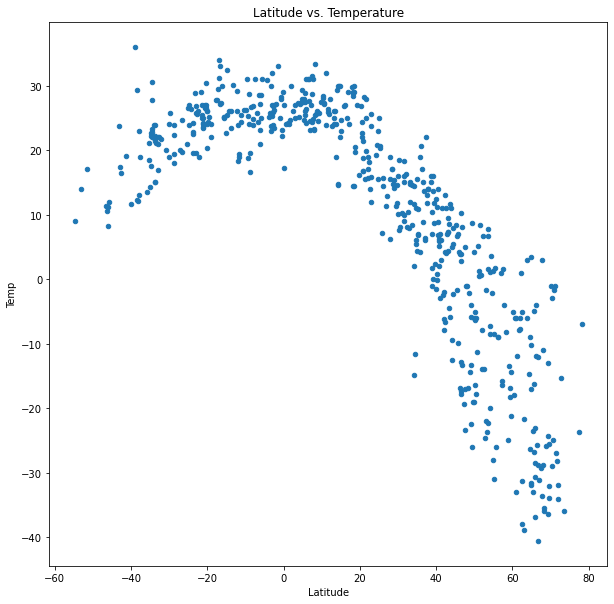

In [11]:
weather_data[["Latitude","Temp"]].plot(kind="scatter", x="Latitude", y="Temp", grid=False, figsize=(10,10),
              title="Latitude vs. Temperature")
plt.show()

## Latitude vs. Humidity Plot

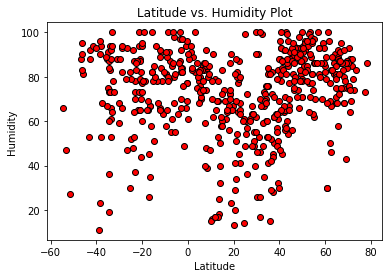

In [12]:
x_values=weather_data["Latitude"]

y_values=weather_data["Humidity"]

plt.scatter(x_values,y_values,facecolors="red", edgecolors="black")


plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("../output_data/fig1.png")

plt.show()




## Latitude vs. Cloudiness Plot

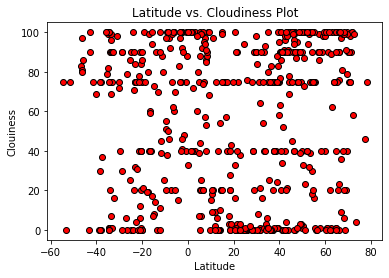

In [13]:
x_values=weather_data["Latitude"]

y_values=weather_data["Cloudiness"]

plt.scatter(x_values,y_values,facecolors="red", edgecolors="black")


plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Clouiness")

plt.savefig("../output_data/fig2.png")

plt.show()


## Latitude vs. Wind Speed Plot

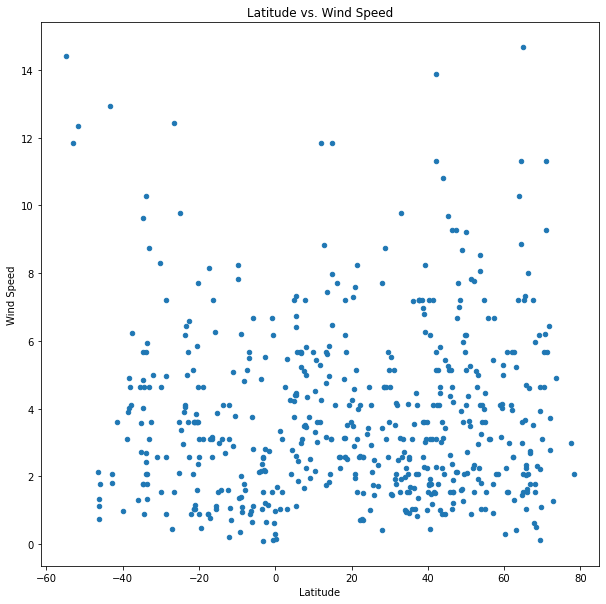

In [14]:
weather_data[["Latitude","Wind Speed"]].plot(kind="scatter", x="Latitude", y="Wind Speed", grid=False, figsize=(10,10),
              title="Latitude vs. Wind Speed")


plt.savefig("../output_data/fig3.png")

plt.show()





## Linear Regression

In [15]:
north_hemisphere_df=weather_data.loc[weather_data["Latitude"]>=0]


south_hemisphere_df=weather_data.loc[weather_data["Latitude"]<=0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is:-0.8822518367157244


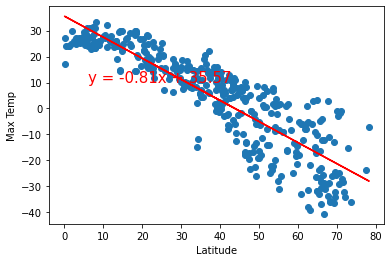

<Figure size 432x288 with 0 Axes>

In [16]:
x_values = north_hemisphere_df['Latitude']
y_values = north_hemisphere_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r-value is:{rvalue}")
plt.show()

plt.savefig("../output_data/cities.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is:0.5988418213711203


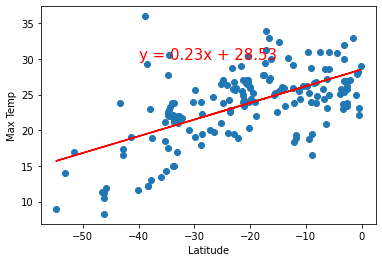

In [25]:
x_values = south_hemisphere_df['Latitude']
y_values = south_hemisphere_df['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

print(f"r-value is:{rvalue}")


plt.savefig("../output_data/fig4.png")
plt.show()



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

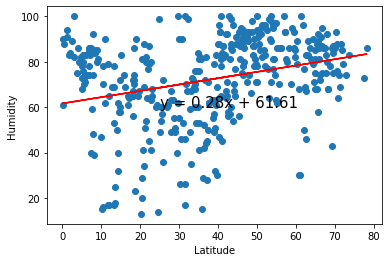

In [26]:
x_values = north_hemisphere_df['Latitude']
y_values = north_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,60),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("../output_data/fig5.png")
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

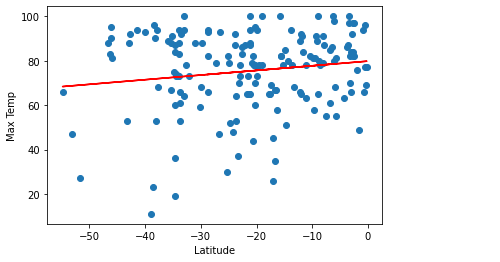

In [19]:
x_values = south_hemisphere_df['Latitude']
y_values = south_hemisphere_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.savefig("../output_data/fig6.png")
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

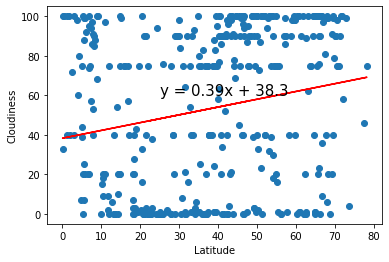

In [20]:
x_values = north_hemisphere_df['Latitude']
y_values = north_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,60),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

plt.savefig("../output_data/fig7.png")
plt.show()




####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

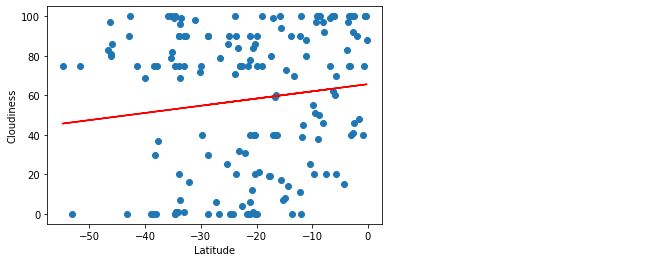

In [21]:
x_values = south_hemisphere_df['Latitude']
y_values = south_hemisphere_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,60),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.savefig("../output_data/fig8.png")
plt.show()



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

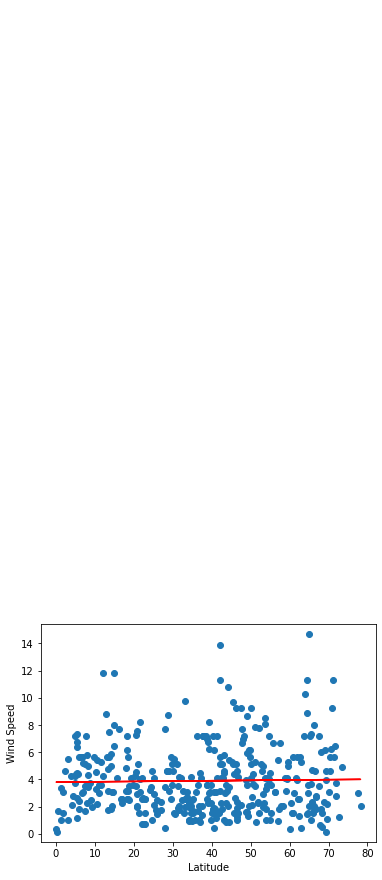

In [22]:
x_values = north_hemisphere_df['Latitude']
y_values = north_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,60),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')


plt.savefig("../output_data/fig9.png")
plt.show()




####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

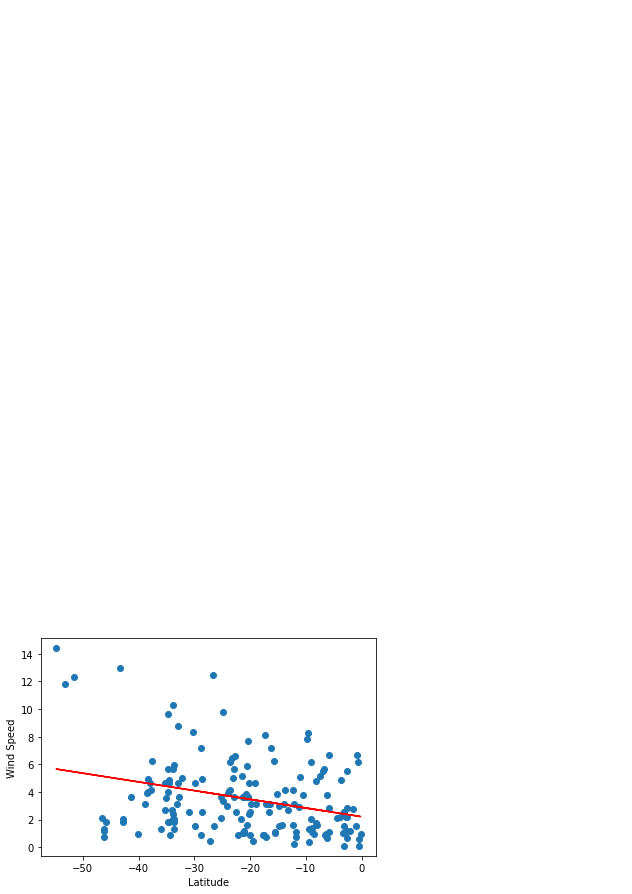

In [23]:
x_values = south_hemisphere_df['Latitude']
y_values = south_hemisphere_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,60),fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("../output_data/fig10.png")
plt.show()




In [24]:
weather_data.to_csv("../output_data/cities.csv")


